# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/Users/rayxu/Downloads/tmpdworw0d4.csv')
print(df.columns)
df.describe()

Index(['case_id', 'open_date', 'case_topic', 'service_name',
       'assigned_department', 'assigned_team', 'case_status', 'closure_reason',
       'closure_comments', 'close_date', 'target_close_date', 'on_time',
       'report_source', 'full_address', 'street_number', 'street_name',
       'zip_code', 'neighborhood', 'public_works_district',
       'city_council_district', 'fire_district', 'police_district', 'ward',
       'precinct', 'submitted_photo', 'closed_photo', 'longitude', 'latitude'],
      dtype='object')


,zip_code,city_council_district,fire_district,ward,precinct,submitted_photo,closed_photo,longitude,latitude
count,5052.000000,5106.000000,5106.000000,5075.000000,5075.000000,0.0,0.0,5051.000000,5051.000000
mean,2127.605305,4.537799,6.813944,11.122562,7.302857,NaN,NaN,-71.085467,42.324886
std,23.105420,2.563329,3.207339,6.857951,4.748908,NaN,NaN,0.035173,0.034433
min,2108.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,-71.181032,42.233076
25%,2118.000000,2.000000,4.000000,5.000000,3.000000,NaN,NaN,-71.108655,42.294456
50%,2125.000000,4.000000,7.000000,11.000000,7.000000,NaN,NaN,-71.075110,42.332301
75%,2130.000000,7.000000,9.000000,18.000000,10.000000,NaN,NaN,-71.061990,42.351264
max,2467.000000,9.000000,12.000000,22.000000,23.000000,NaN,NaN,-70.997868,42.392547


In [23]:
df['close_dt']=pd.to_datetime(df['close_date'], errors='coerce')
df['open_dt']=pd.to_datetime(df['open_date'], errors='coerce')
closed_cases = df.dropna(subset=['close_dt']).copy()
closed_cases['duration']= (df['close_dt']-df['open_dt']).dt.days
eda_stat = closed_cases.groupby('case_topic')['duration'].mean().reset_index().sort_values(by='duration', ascending = False)
print(eda_stat)

                 case_topic   duration
4          Planting Request  25.666667
2              Lane Divider  18.000000
8       Street Light Outage  11.684685
5           Pruning Request  10.196970
9     Tree or Stump Removal   6.820225
7        Street Light Other   4.865385
6    Street Light Knockdown   3.037879
0     Domestic Animal Issue   1.701536
3                  Lost Pet   1.178082
10        Wild Animal Issue   0.377025
1   Fallen Tree or Branches   0.342466


                 case_topic   duration
4          Planting Request  25.666667
2              Lane Divider  18.000000
8       Street Light Outage  11.684685
5           Pruning Request  10.196970
9     Tree or Stump Removal   6.820225
7        Street Light Other   4.865385
6    Street Light Knockdown   3.037879
0     Domestic Animal Issue   1.701536
3                  Lost Pet   1.178082
10        Wild Animal Issue   0.377025
1   Fallen Tree or Branches   0.342466


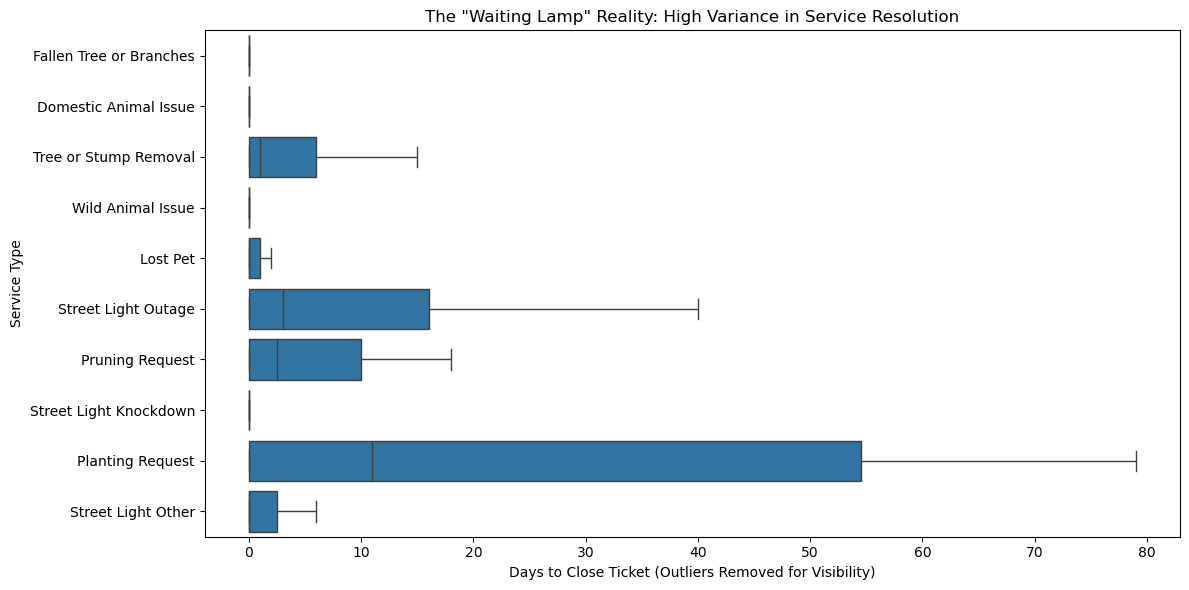

In [ ]:
df['close_dt'] = pd.to_datetime(df['close_date'], errors='coerce')
df['open_dt'] = pd.to_datetime(df['open_date'], errors='coerce')

closed_cases = df.dropna(subset=['close_dt']).copy()
closed_cases['duration'] = (closed_cases['close_dt'] - closed_cases['open_dt']).dt.days

# eda_statistic
eda_stat = closed_cases.groupby('case_topic')['duration'].mean().reset_index().sort_values(by='duration', ascending=False)
print(eda_stat)

# visualization
top_types = closed_cases['case_topic'].value_counts().head(10).index
subset = closed_cases[closed_cases['case_topic'].isin(top_types)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='duration', y='case_topic', showfliers=False)
plt.title('Variance in Service Resolution')
plt.xlabel('Days to Close Ticket (Outliers Removed)')
plt.ylabel('Service Type')
plt.tight_layout()
plt.savefig('eda_variance.png') 
plt.show()

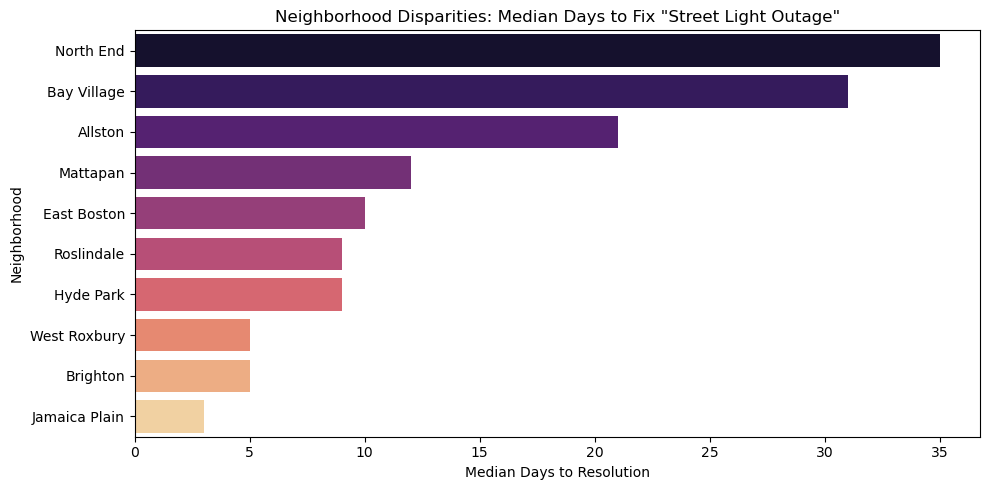

In [26]:
target_issue = 'Street Light Outage' 
issue_df = closed_cases[closed_cases['case_topic'].str.contains(target_issue, case=False, na=False)]
#median duration by neighborhood, sorted descending
worst_neighborhoods = issue_df.groupby('neighborhood')['duration'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
#visualiza
sns.barplot(
    x=worst_neighborhoods.values, 
    y=worst_neighborhoods.index, 
    palette='magma',
    hue=worst_neighborhoods.index, 
    legend=False                   
)

plt.title(f'Neighborhood Disparities: Median Days to Fix "{target_issue}"')
plt.xlabel('Median Days to Resolution')
plt.ylabel('Neighborhood') 
plt.tight_layout()
plt.savefig('eda_equity.png')
plt.show()